In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [35]:
df = pd.read_csv("data/g1_linear.txt", sep="\t")
#df = df.astype('float')
df.columns

Index(['Frequency ', 'VF1'], dtype='object')

In [51]:
files = {os.path.splitext(k)[0].split('_')[0]: {} for k in os.listdir('data') if '.txt' in os.path.splitext(k)[1]}

for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.txt' in ext:
        df = pd.read_csv(f'data/{file}', sep="\t")
        for row in df.iloc:
            for col in df.columns:
                row[col] = float(row[col].replace(',', '.'))
        files[name.split('_')[0]] = df

## Plot ganancia

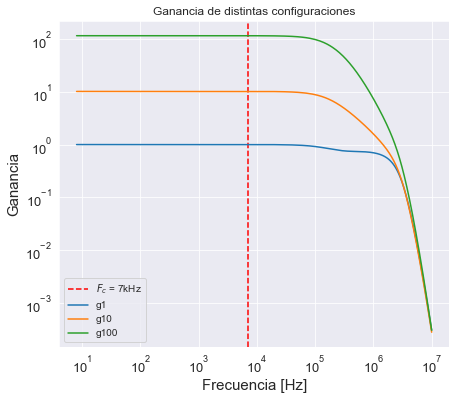

In [81]:

#sns.set_style('darkgrid')
plt.figure(figsize=(7,6))

plt.title("Ganancia de distintas configuraciones")
plt.ylabel(r"Ganancia", fontsize = 15)
plt.xlabel("Frecuencia [Hz]",fontsize=15)
plt.axvline(7000,ls='--',color='red',label='$F_c$ = 7kHz')
plt.tick_params(axis='both', labelsize=13)

gs = ['g1','g10','g100']
for g in gs:
    x = files[g]['Frequency ']
    y = files[g]['VF1']
    plt.plot(x,y,label=g)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


### Plot impedancia entrada

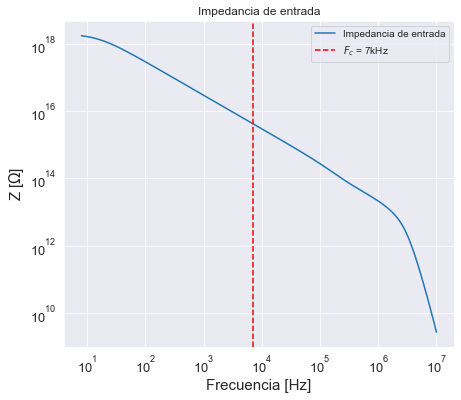

In [87]:

#sns.set_style('darkgrid')
plt.figure(figsize=(7,6))

plt.title("Impedancia de entrada")
plt.ylabel(r"Z [$\Omega$]", fontsize = 15)
plt.xlabel("Frecuencia [Hz]",fontsize=15)
x = files['Zi']['Frequency ']
y = files['Zi']['Zi_Ohm']
plt.plot(x,y,label='Impedancia de entrada')

plt.axvline(7000,ls='--',color='red',label='$F_c$ = 7kHz')
plt.tick_params(axis='both', labelsize=13)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


## Plot Out(t)

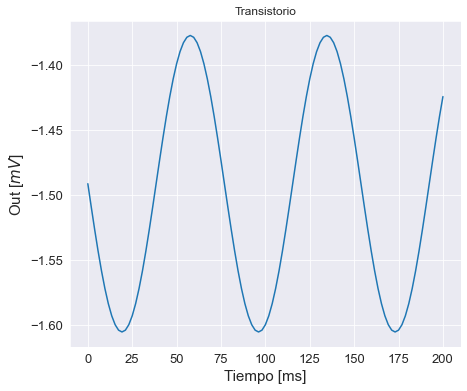

In [96]:

#sns.set_style('darkgrid')
plt.figure(figsize=(7,6))

plt.title("Transistorio")
plt.ylabel(r"Out [$mV$]", fontsize = 15)
plt.xlabel("Tiempo [ms]",fontsize=15)
x = files['out']['Time ']*1000
y = files['out']['VF1_Volt']*1000 # mV
plt.plot(x,y)
plt.tick_params(axis='both', labelsize=13)
#plt.yscale('log')
#plt.xscale('log')
#plt.legend()
plt.show()
